In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2

import pickle

- data URL: https://www.kaggle.com/crawford/cat-dataset/data#

# First folder data

In [2]:
for folder in filter(lambda x: x.startswith("CAT_"), os.listdir("data")):
    data_dir = f"data/{folder}"
    data = []
    label = []
    for file in filter(lambda x: x.endswith(".jpg"), sorted((os.listdir(data_dir)))):
        img = plt.imread(f"{data_dir}/{file}")

        scaler_x, scaler_y, _ = img.shape
        scaler_x = (224/scaler_x)
        scaler_y = (224/scaler_y)

        img_resize = cv2.resize(img, (224, 224))

        with open(f"{data_dir}/{file}.cat") as f:
            point = f.readline()
            point = point.strip().split(" ")[1:]
            point = np.array(point).astype(int).reshape(-1, 2)
            point_resize = (point * [scaler_y, scaler_x]).astype(int)

        data += [img_resize]
        label += [point_resize]
        
    with open(f"resized_{folder}_0.pkl", "wb") as f:
        data = np.array(data)
        label = np.array(label)
        pickle.dump({"data": data, "label": label}, f)

# Second folder data

In [5]:
for folder in filter(lambda x: x.startswith("CAT_"), os.listdir("data/cats")):
    data_dir = f"data/{folder}"
    data = []
    label = []
    for file in filter(lambda x: x.endswith(".jpg"), sorted((os.listdir(data_dir)))):
        img = plt.imread(f"{data_dir}/{file}")

        scaler_x, scaler_y, _ = img.shape
        scaler_x = (224/scaler_x)
        scaler_y = (224/scaler_y)

        img_resize = cv2.resize(img, (224, 224))

        with open(f"{data_dir}/{file}.cat") as f:
            point = f.readline()
            point = point.strip().split(" ")[1:]
            point = np.array(point).astype(int).reshape(-1, 2)
            point_resize = (point * [scaler_y, scaler_x]).astype(int)

        data += [img_resize]
        label += [point_resize]
        
    with open(f"resized_{folder}_1.pkl", "wb") as f:
        data = np.array(data)
        label = np.array(label)
        pickle.dump({"data": data, "label": label}, f)

# Check data pickled

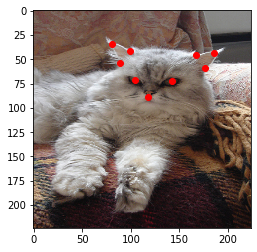

In [6]:
with open("resized_CAT_00_0.pkl", "rb") as f:
    data = pickle.load(f)

img = data["data"][0]
point = data["label"][0]

plt.imshow(img)
plt.scatter(point[:,0], point[:,1], color="red")